In [15]:
import numpy as np
import pandas as pd
import datetime
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os.path

In [16]:
ticker = "AAPL"


end_date = datetime.date(2018,12,31)
start_date = datetime.date(2017, 1, 1)

# Get 1 year's worth of historical data for AAPL
df = get_historical_data(ticker, start_date, end_date,  output_format='pandas')
df.head()

,open,high,low,close,volume
date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-09,117.95,119.43,117.94,118.99,33561948


In [17]:
import googlefinance
import yahoofinancials

In [18]:
# from yahoofinancials import YahooFinancials

# ticker = 'AAPL'
# yahoo_financials = YahooFinancials(ticker)

# balance_sheet_data_qt = yahoo_financials.get_financial_stmts('quarterly', 'balance')
# income_statement_data_qt = yahoo_financials.get_financial_stmts('quarterly', 'income')
# all_statement_data_qt =  yahoo_financials.get_financial_stmts('quarterly', ['income', 'cash', 'balance'])
# apple_earnings_data = yahoo_financials.get_stock_earnings_data()
# apple_net_income = yahoo_financials.get_net_income()
# historical_stock_prices = yahoo_financials.get_historical_price_data('2008-09-15', '2018-09-15', 'daily')


In [19]:
#
# THIS IS WHAT WE CAN USE!!!!
#
#

# from pandas_datareader import data


# df = data.DataReader('SPY', 'yahoo', '2005-01-01', '2018-12-31').filter(['Date','Adj Close'])
# df.rename(
#     columns={'Adj Close':'SPY'}, 
#     inplace=True
# )
# print(df)

In [20]:
from pandas_datareader import data

def fetch_prices_as_df(ticker,start,end):
    """ Fetch ticker adjusted closing prices for start-end date range"""
    # Caveat: only ever use the same time series, or your pickes won't be consistent.
    # TODO: implement flush=[True,False] to write new files
    serialized_ticker_file = f"./pickle_stock_data/{ticker}.pickle"
    df = None
    if os.path.exists(serialized_ticker_file):
        df = pickle.load( open( serialized_ticker_file, "rb" ) )
    else:
        df = data.DataReader(ticker,'yahoo',start,end).filter(['Date','Adj Close'])
        df.rename(columns={'Adj Close': ticker},inplace=True)
        pickle.dump( df, open( serialized_ticker_file, "wb" ) )
    return df

In [24]:
spy_df = fetch_prices_as_df('AGG','2005-01-01', '2018-12-31')
spy_df

,AGG
Date,
2005-01-03,63.249550
2005-01-04,63.187786
2005-01-05,63.163124
2005-01-06,63.206306
2005-01-07,63.187786
...,...
2018-12-24,103.860847
2018-12-26,103.664619
2018-12-27,103.831429


In [25]:
def combine_dfs(original_df,new_df):
    return pd.concat([original_df,new_df],axis="columns", join="inner")

In [26]:
tickers = ['SPY','AGG']
start = '2005-01-01'
end = '2018-12-31'

big_daddy = None

for ticker in tickers:
    big_daddy = combine_dfs(big_daddy, fetch_prices_as_df(ticker,'2005-01-01', '2018-12-31'))
    
big_daddy

,SPY,AGG
Date,,
2005-01-03,89.905312,63.249550
2005-01-04,88.806694,63.187786
2005-01-05,88.193878,63.163124
2005-01-06,88.642288,63.206306
2005-01-07,88.515228,63.187786
...,...,...
2018-12-24,232.183060,103.860847
2018-12-26,243.914062,103.664619
2018-12-27,245.786697,103.831429


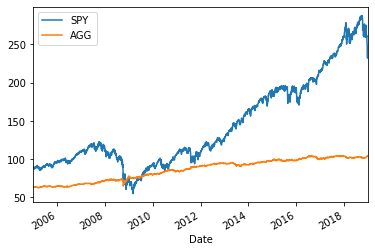

In [27]:
big_daddy.plot()